In [11]:
import matplotlib.pyplot as plt     
import torch
import torch.optim as optim   
import torch.nn as nn  
import torch.nn.functional as F  
import torchvision
from torchvision import transforms as transforms, datasets
import tqdm as tqdm  

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('', download=True, train=True, transform=transform)
testset = datasets.MNIST('', download=True, train=False, transform=transform)

In [30]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False)

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 256)
        self.fc5 = nn.Linear(256, 128)
        self.fc6 = nn.Linear(128, 128)
        self.fc7 = nn.Linear(128, 64)
        self.fc8 = nn.Linear(64, 64)
        self.fc9 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return F.log_softmax(x, dim=1)

**View Model Architecture**

In [40]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=128, bias=True)
  (fc7): Linear(in_features=128, out_features=64, bias=True)
  (fc8): Linear(in_features=64, out_features=64, bias=True)
  (fc9): Linear(in_features=64, out_features=10, bias=True)
)


In [43]:
from torchsummary import summary
input_size = (1, 28, 28)
flattened_input_size = (1, 28 * 28)
summary(net, input_size=flattened_input_size, batch_size=-1, device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 512]         401,920
            Linear-2               [-1, 1, 512]         262,656
            Linear-3               [-1, 1, 256]         131,328
            Linear-4               [-1, 1, 256]          65,792
            Linear-5               [-1, 1, 128]          32,896
            Linear-6               [-1, 1, 128]          16,512
            Linear-7                [-1, 1, 64]           8,256
            Linear-8                [-1, 1, 64]           4,160
            Linear-9                [-1, 1, 10]             650
Total params: 924,170
Trainable params: 924,170
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 3.53
Estimated Total Size (MB): 3.54
-------------------------------------------

In [47]:
model_path = r'C:\Users\shory\Desktop\ML\integer.pth'
torch.save(net.state_dict(), model_path)

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 10
for epoch in range(EPOCHS):
    running_loss = 0.0
    for batch_idx, data in enumerate(trainloader, 1):
        inputs, labels = data
        inputs = inputs.view(-1, 28 * 28)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # if batch_idx % 100 == 0:
        #     print(f"Epoch {epoch + 1}, Batch {batch_idx}, Loss: {loss.item()}")

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}")


Epoch 1, Loss: 0.4980677914867799
Epoch 2, Loss: 0.1605607011821121
Epoch 3, Loss: 0.10861257463383178
Epoch 4, Loss: 0.08802435137641927
Epoch 5, Loss: 0.0724244570134518
Epoch 6, Loss: 0.059312275839232216
Epoch 7, Loss: 0.04860385827545542
Epoch 8, Loss: 0.044302855422817325
Epoch 9, Loss: 0.038988283956035354
Epoch 10, Loss: 0.034377009403833654


In [34]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(-1, 28 * 28)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        print("Predicted Values:", predicted)
        print("Actual values:", labels)

Predicted Values: tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
Actual values: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0,
        2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4,
        1, 7, 6, 9])
Predicted Values: tensor([6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6,
        7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2,
        0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7,
        2, 3, 2, 7, 1, 8, 1

In [35]:

print(f"Accuracy on the test set: {100 * correct / total:.2f}%")

Accuracy on the test set: 97.96%


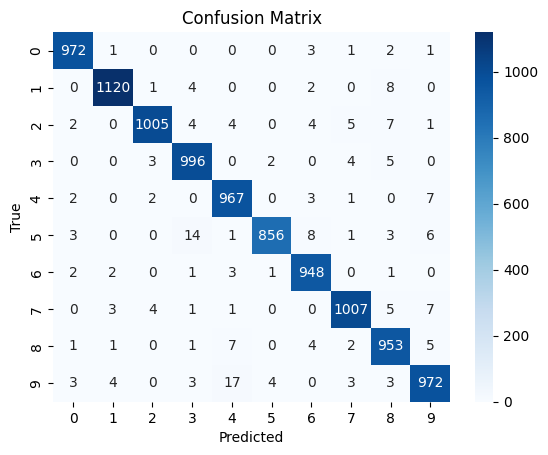

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Lists to store predictions and true labels
all_predictions = []
all_labels = []

# Evaluate the model on the test set
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs = inputs.view(-1, 28 * 28)
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)

        # Append predictions and true labels to the lists
        all_predictions.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# Create the confusion matrix
cm = confusion_matrix(all_labels, all_predictions)

# Plot the confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')
f1 = f1_score(all_labels, all_predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.9797058009255848
Recall: 0.9796
F1 Score: 0.9795966585353272
